In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler
import numpy as np

trip - Trip id <br>
date - Date, when trip was made <br>
dayPart - Day or Night <br>
exWeatherTag - Heat / Snow <br>
originLocation - Source location <br>
destinationLocation - Destination location <br>
distance - distance traveled <br>
type - Expedited or Not <br>
weight - weight carried by carriers <br>
packageType - Type of packages <br>
carrier - Name of the carriers <br>

In [2]:
# loading data into df variable from our csv file
df = pd.read_csv('dataset/train.csv')

In [3]:
# A first look into top 10 rows of our data
df.head(10)

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777
5,t40188190,2017-06-19,day,heat,S9,D7,3200,NaN,3,NaN,B,14.126206
6,t32905776,2017-02-09,day,NaN,S6,D1,1400,NaN,17,NaN,B,39.492590
7,t78320097,2018-10-01,day,NaN,S7,D4,2200,NaN,21,NaN,B,43.729438
8,t63539140,2018-11-26,night,NaN,S3,D7,2000,NaN,16,NaN,B,41.079265
9,t27682545,2019-05-26,night,NaN,S5,D7,2400,NaN,8,NaN,B,36.197725


Just from out first insight we can see that <strong>trip</strong> might have been used as a primary key and many values in <strong>packageType</strong> and <strong>Type</strong> is NaN. <br>
<strong>exWeatherTag</strong> column might also have many NaN values.

In [4]:
# Checking total number of rows and columns
df.shape

(38999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip                 38999 non-null  object 
 1   date                 38999 non-null  object 
 2   dayPart              38999 non-null  object 
 3   exWeatherTag         4882 non-null   object 
 4   originLocation       38999 non-null  object 
 5   destinationLocation  38999 non-null  object 
 6   distance             38999 non-null  int64  
 7   type                 3748 non-null   object 
 8   weight               38999 non-null  int64  
 9   packageType          2500 non-null   object 
 10  carrier              38999 non-null  object 
 11  cost                 38999 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


Here, we can see that total we have 38999 total observations(rows) and 12 columns or featues

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['trip'].value_counts().sum()

38999

After counting the total number of unique values in trip column, we can see it is same as number of rows; which means every value is unique.

In [8]:
df['packageType'].isna().sum() / df.shape[0] * 100

93.58957921998

In [9]:
df['exWeatherTag'].isna().sum() / df.shape[0] * 100

87.48173030077695

In [10]:
df['type'].isna().sum() / df.shape[0] * 100

90.38949716659401

#### Trip is just acting as a unique identifier and will not have any significance to our model. It is better to remove it now.

#### approx 93, 87 and 90 percent of values are missing in packageType, exWeatherTag and type column. 

In [11]:
df.drop(['trip', 'packageType', 'exWeatherTag', 'type', 'date'], axis=1, inplace=True)

In [12]:
df.head()

,dayPart,originLocation,destinationLocation,distance,weight,carrier,cost
0,night,S4,D7,2200,50,D,68.413152
1,night,S8,D1,1800,12,B,36.450649
2,night,S9,D5,2800,1,B,9.057939
3,day,S9,D7,3200,50,C,57.320087
4,day,S9,D1,2000,43,B,77.263777


In [13]:
df.shape

(38999, 7)

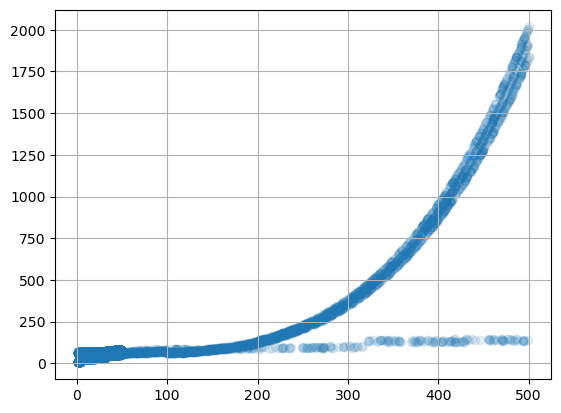

In [14]:
plt.scatter(df['weight'], df['cost'],alpha=0.1)
plt.grid()

In [15]:
df1 = df[(df['cost']< 250) & (df['weight']> 250 )]
drop_rows = list(df1.index)
df.drop(drop_rows, axis=0, inplace=True)

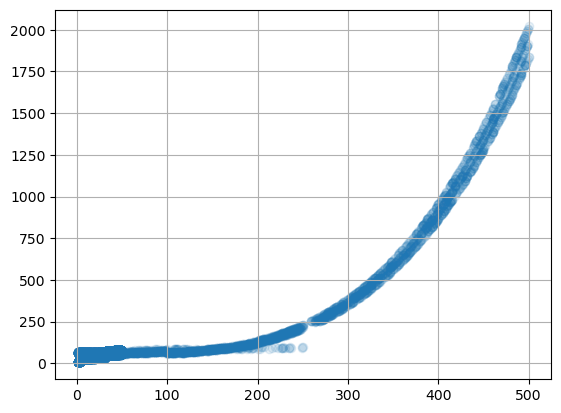

In [16]:
plt.scatter(df['weight'], df['cost'],alpha=0.1)
plt.grid()

In [28]:
df.shape

(38769, 7)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'cost'], df['cost'], test_size=0.25, random_state=42)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (29076, 6)
X_test.shape: (9693, 6)
y_train.shape: (29076,)
y_test.shape: (9693,)


In [31]:
X_train.shape

(29076, 6)

In [33]:
ct = ColumnTransformer(transformers=[
        ('scaler', StandardScaler(), ['distance', 'weight']),
        ('encoder', OneHotEncoder(sparse=False, drop='first'), ['dayPart', 'carrier', 'originLocation', 'destinationLocation'])
    ], remainder='passthrough')

In [34]:
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

C:\Users\rojit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\rojit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [45]:
param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [True, False], 'n_estimators': [3, 5, 10, 50, 100], 'max_features': [2, 3, 4]},
]
rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [True, False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 5, 10, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
model = grid_search.best_estimator_

In [47]:
model.predict(X_test)

array([69.64282275, 47.94397192,  9.21588522, ..., 34.94921084,
       44.62683714, 71.19429957])

In [48]:
predicted_y = model.predict(X_test)

In [49]:
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, predicted_y)))

Root Mean Squared Error (RMSE): 11.112197118823074


In [50]:
model.score(X_test, y_test)

0.9964291684955157